# Celestial Stellar Classification 

## Preliminary 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import hdbscan
# import umap
import plotly.graph_objects as go
import numpy as np

In [2]:

df = pd.read_csv("/Users/ardhyaandien/dataGaia.csv")

In [3]:
df.head()

,Unnamed: 0,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,e_Gmag,...,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame,SpType-ELS
0,0,47.451110,2.205457,740830319452928,1.1750,8.488,2.263,-8.181,10.966603,0.002786,...,0.090974,NaN,9406.7,918.2012,2.3686,33.161472,2.255,0.404,0.527215,A
1,1,44.375187,2.895901,1402912413121792,1.8937,16.954,7.031,-15.427,10.369156,0.002801,...,0.163792,NaN,9348.7,679.7121,2.4642,25.817343,2.157,0.336,0.638083,A
2,2,42.959304,2.920459,1546703623466880,2.9732,2.528,1.795,1.780,10.038978,0.002774,...,0.304139,NaN,7520.7,339.8108,1.9321,10.527038,1.688,1.033,0.507551,A
3,3,44.031079,3.203683,1614053005633024,2.2337,10.776,-3.151,-10.305,9.810181,0.002786,...,0.338961,1.5956,7052.3,433.9715,2.9735,20.801886,1.923,1.124,0.368294,A
4,4,45.463599,3.138095,1753553543188992,4.0179,10.053,1.828,9.885,8.163041,0.002800,...,0.091842,NaN,9982.8,251.2483,2.2829,45.868046,2.447,0.320,0.509338,A


In [4]:
rows, columns = df.shape
print("Rows:", rows)
print("Columns:", columns)

Rows: 611689
Columns: 28


In [5]:
df.isna().sum() # check NAs 

Unnamed: 0         0
RA_ICRS            0
DE_ICRS            0
Source             0
Plx                0
PM                 0
pmRA               0
pmDE               0
Gmag               1
e_Gmag             1
BPmag              1
e_BPmag            1
RPmag              0
e_RPmag            0
GRVSmag       103968
e_GRVSmag     103968
BP-RP              1
BP-G               1
G-RP               1
pscol         595301
Teff               0
Dist               0
Rad                0
Lum-Flame      14131
Mass-Flame     32728
Age-Flame      73661
z-Flame        14131
SpType-ELS         0
dtype: int64

In [6]:
df = df.drop(["GRVSmag", "e_GRVSmag", "pscol", "Lum-Flame", "Mass-Flame", "Age-Flame", "z-Flame"], axis=1) # removes columns with high NAs

In [7]:
df = df.dropna() # removes rows with NAs

## 2015 Milky Way CLuster Catalog 

https://heasarc.gsfc.nasa.gov/W3Browse/star-catalog/mwsc.html

In [7]:
feb_14 = pd.read_csv("/Users/ardhyaandien/cluster2014.csv") ## Adding cluster data
sep_14 = pd.read_csv("/Users/ardhyaandien/cluster2014(2).csv")
oct_15 = pd.read_csv("/Users/ardhyaandien/cluster2015.csv")

In [8]:
# Combine the useful columns
clusterdf = pd.concat([feb_14[["Name", "RAJ2000","DEJ2000","r2","d"]],sep_14[["Name", "RAJ2000","DEJ2000","r2","d"]],oct_15[["Name", "RAJ2000","DEJ2000","r2","d"]]], ignore_index = True)
clusterdf.value_counts()

Name        RAJ2000  DEJ2000  r2     d     
1636-283    249.856  -28.399  0.075  8308.0    1
NGC_1252    47.700   -57.760  0.250  944.0     1
Morgan_8    84.112   -6.420   0.230  314.0     1
Muzzio_1    134.490  -47.695  0.180  1394.0    1
NGC_1027    40.665    61.620  0.235  950.0     1
                                              ..
FSR_0596    37.432    58.100  0.135  1417.0    1
FSR_0606    66.729    73.380  0.110  2499.0    1
FSR_0611    39.382    56.405  0.165  1000.0    1
FSR_0612    47.550    64.280  0.090  1900.0    1
vdBergh_92  106.020  -11.530  0.250  1570.0    1
Name: count, Length: 3208, dtype: int64

In [9]:
# Checks for NAs per column
clusterdf.isna().sum()

Name       1
RAJ2000    1
DEJ2000    1
r2         1
d          1
dtype: int64

In [10]:
# Drops NA in rows
clusterdf = clusterdf.dropna() # removes rows with NAs
clusterdf.isna().sum()

Name       0
RAJ2000    0
DEJ2000    0
r2         0
d          0
dtype: int64

In [11]:
# Check for duplicate coordinates /clusters
duplicates_by_columns = clusterdf[clusterdf.duplicated(subset=['RAJ2000', 'DEJ2000'])]
print("\nDuplicate rows based on 'RAJ2000' and 'DEJ2000' columns:")
print(duplicates_by_columns)


Duplicate rows based on 'RAJ2000' and 'DEJ2000' columns:
Empty DataFrame
Columns: [Name, RAJ2000, DEJ2000, r2, d]
Index: []


In [12]:
# Change right ascention to time
clusterdf["RA_Time"] = clusterdf["RAJ2000"]/15

In [ ]:
# Plot RA and D
plt.figure(figsize=(16, 12)) 

sns.scatterplot(
    data=clusterdf,
    x="RA_Time",
    y="DEJ2000",
    palette="coolwarm",
    s = clusterdf["r2"] * 100
)
plt.xlabel("Ascension")
plt.ylabel("Declinaton")

## Data Analysis

In [14]:
df["RA_Time"] = df["RA_ICRS"]/15 #to fit ideal RA

In [15]:
df["RA_Time"].min()

1.3680161333333333e-05

/Users/ardhyaandien/.pyenv/versions/3.11.4/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


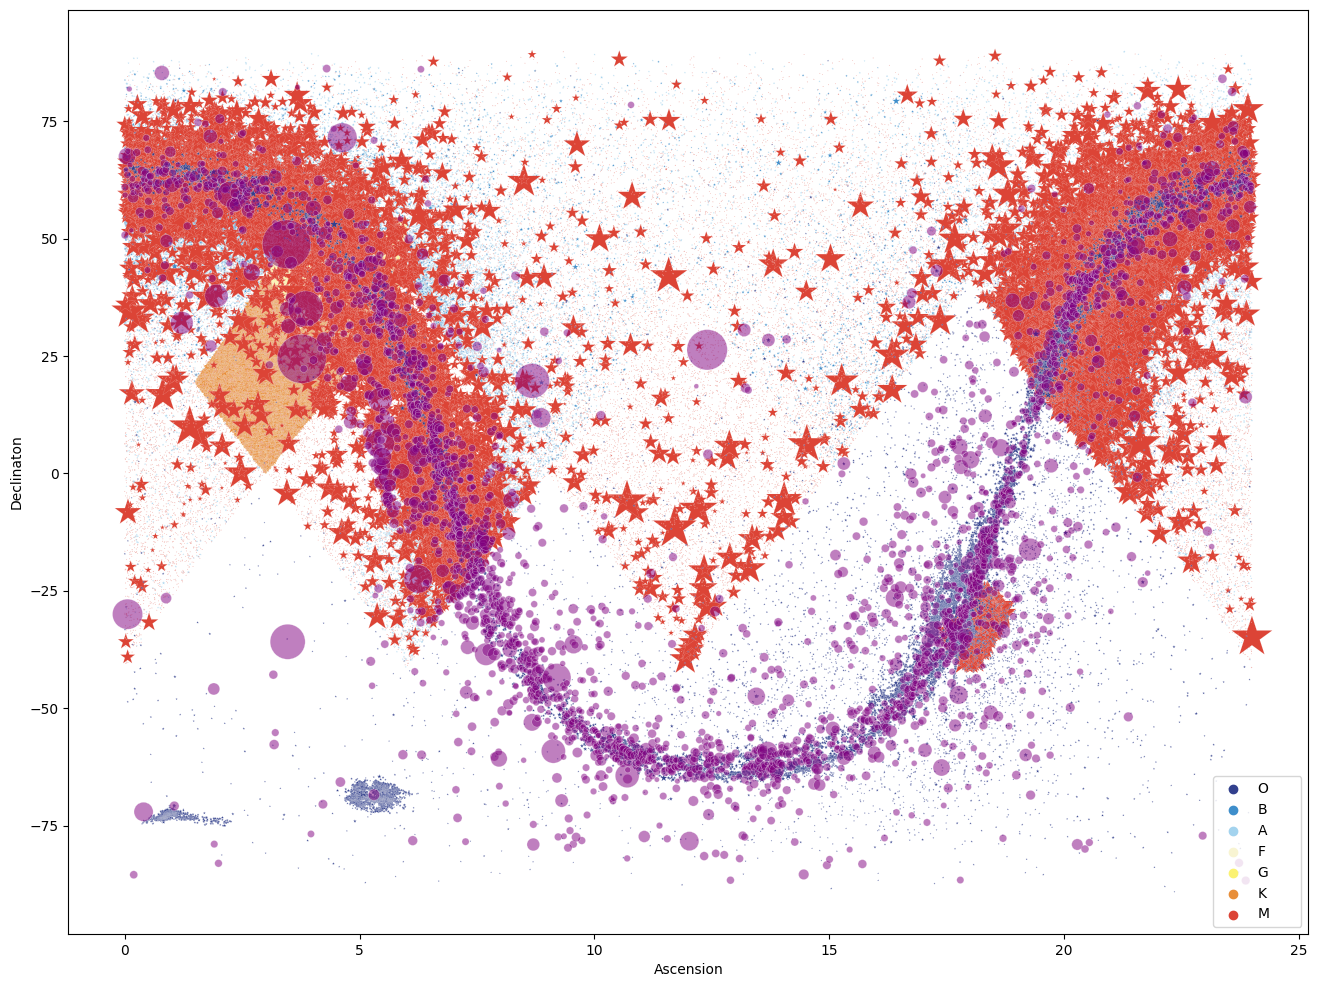

In [16]:
palette = [
    "#32408d",  # Dark Blue
    "#3e8ecb",  # Blue
    "#a3d3ee",  # Light Blue
    "#f8f4d2",  # Light Yellow
    "#fbf272",  # Yellow
    "#e88e39",  # Orange
    "#dc4436",  # Maroon
]


plt.figure(figsize=(16, 12)) 

sns.scatterplot(
    data=df,
    x="RA_Time",
    y="DE_ICRS",
    hue="SpType-ELS",
    hue_order= ["O      ", "B      ", "A      ", "F      ", "G      ", "K      ", "M      "],
    palette=palette,
    s = df["Rad"],
    marker='*'
)

sns.scatterplot(
    data=clusterdf,
    x="RA_Time",
    y="DEJ2000",
    color="purple",
    s = clusterdf["r2"] * 200,
    alpha=0.5
)

plt.xlabel("Ascension")
plt.ylabel("Declinaton")



plt.show()

In [ ]:
hue_order = ["O      ", "B      ", "A      ", "F      ", "G      ", "K      ", "M      "]
palette = [
    "#32408d",  # Dark Blue
    "#3e8ecb",  # Blue
    "#a3d3ee",  # Light Blue
    "#f8f4d2",  # Light Yellow
    "#fbf272",  # Yellow
    "#e88e39",  # Orange
    "#dc4436",  # Maroon
]

fig = px.scatter_3d(
    df,
    x="Dist",
    y = "RA_Time",
    z="DE_ICRS",
    color ="SpType-ELS",
    category_orders={"SpType-ELS": hue_order},
    color_discrete_sequence=palette,
    labels={'SpType-ELS': 'MK Classification System','Dist': 'Distance from Sun', 'RA_Time': 'Right Ascension', 'DE_ICRS': 'Declination'},
    title= "Stellar Map by Celestial Coordinates",
    width=1400, height=1200 
)

# Reverse the x-axis
fig.update_layout(
    scene = dict(
        xaxis = dict(autorange="reversed")))

fig.update_layout(
    scene = dict(
        aspectmode="manual",
        aspectratio=dict(x=1, y=1.5, z=1), # This will make the y-axis 4 times "wider" visually
        yaxis=dict(range=[0, 24]) # Still set the range as needed
    )
)


fig.update_traces(marker=dict(size=df["Rad"]/1.5,
                              symbol="cross",
                              line=dict(width=0.002,
                                        color='LightGrey')),
                  selector=dict(mode='markers'))



fig.show()

In [ ]:
hue_order = ["O      ", "B      ", "A      ", "F      ", "G      ", "K      ", "M      "]
palette = [
    "#32408d",  # Dark Blue
    "#3e8ecb",  # Blue
    "#a3d3ee",  # Light Blue
    "#f8f4d2",  # Light Yellow
    "#fbf272",  # Yellow
    "#e88e39",  # Orange
    "#dc4436",  # Maroon
]

fig = px.scatter_3d(
    df,
    x="Plx",
    y = "RA_Time",
    z="DE_ICRS",
    color ="SpType-ELS",
    category_orders={"SpType-ELS": hue_order},
    color_discrete_sequence=palette,
    labels={'SpType-ELS': 'MK Classification System','Plx': 'Parallex', 'RA_Time': 'Right Ascension', 'DE_ICRS': 'Declination'},
    width=1000, height=800
)

# Reverse the x-axis
fig.update_layout(
    scene = dict(
        xaxis = dict(autorange="reversed")))

fig.update_layout(
    scene = dict(
        aspectmode="manual",
        aspectratio=dict(x=1, y=1.5, z=1), # This will make the y-axis 4 times "wider" visually
        yaxis=dict(range=[0, 24]) # Still set the range as needed
    )
)


fig.update_traces(marker=dict(size=df["Rad"]/1.5,
                              symbol="cross",
                              line=dict(width=0.002,
                                        color='LightGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [ ]:
fig = px.scatter_3d(
    clusterdf,hover_data=["Name"], x="d", y="RA_Time", z="DEJ2000",
    labels={'Name': 'Cluster Name','d': 'Distance from Sun', 'RA_Time': 'Right Ascension', 'DEJ2000': 'Declination'},
    title= "Star Cluster Map by Celestial Coordinates",
    width=600, height=800 
    
)

# Reverse the x-axis
fig.update_layout(
    scene = dict(
        xaxis = dict(autorange="reversed")
    )
)


fig.update_traces(marker=dict(size=clusterdf.r2 * 10,
                              symbol="cross",
                              color ="yellow",
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [ ]:
plt.figure(figsize=(16, 12)) 

sns.scatterplot(
    data=df,
    x="pmRA",
    y="pmDE",
    hue="SpType-ELS",
    hue_order= ["O      ", "B      ", "A      ", "F      ", "G      ", "K      ", "M      "],
    palette="coolwarm",
)
plt.xlabel("Proper Motion Right Ascension")
plt.ylabel("Proper Motion Declinaton")


plt.show()

In [23]:
df["SpType-ELS"].unique()

array(['A      ', 'B      ', 'F      ', 'G      ', 'K      ', 'M      ',
       'O      '], dtype=object)

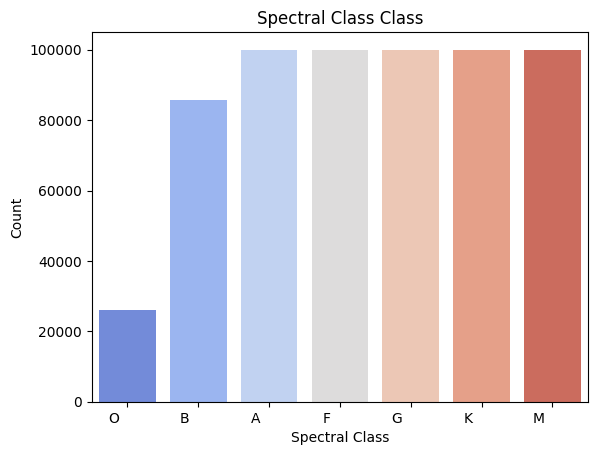

In [24]:
sns.countplot(data=df, x="SpType-ELS", palette="coolwarm", order = ["O      ", "B      ", "A      ", "F      ", "G      ", "K      ", "M      "])  # vertical bars
plt.title("Spectral Class Class")
plt.xlabel("Spectral Class")
plt.ylabel("Count")
plt.show()

In [ ]:
# Creating Absolute Magnitude 

df["ABSmag"] = df["Gmag"] + 5 - 5 * np.log10(df["Dist"])
df["ABSmag"].tolist()


In [ ]:
df[df["Rad"] < 1000]["Rad"]

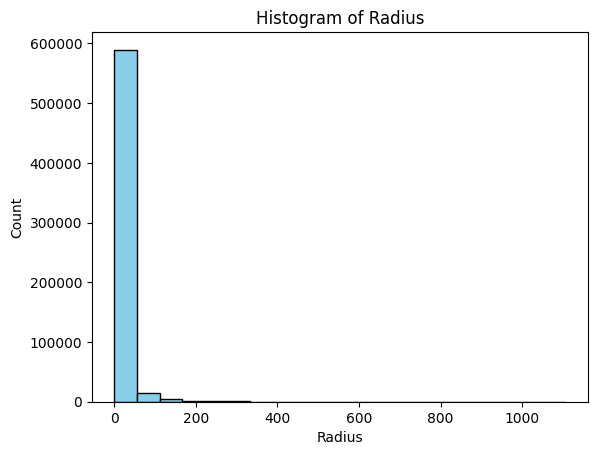

In [27]:
plt.hist(df["Rad"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Radius")
plt.ylabel("Count")
plt.title("Histogram of Radius")
plt.show()

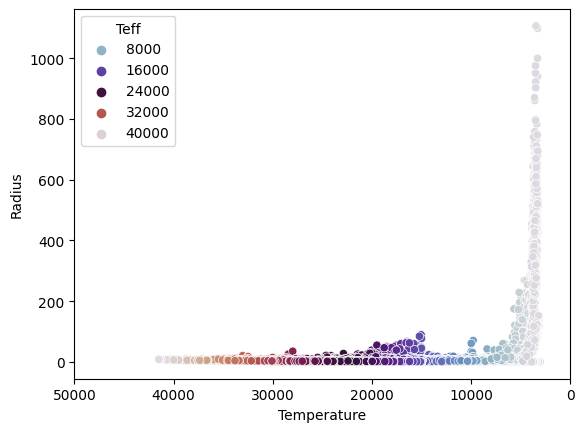

In [28]:
sns.scatterplot(
    data=df,
    x="Teff",
    y="Rad",
    hue="Teff",
    hue_order= "Rad",
    palette="twilight"
)
plt.xlabel("Temperature")
plt.ylabel("Radius")
plt.xlim(50000, 0)


plt.show()

In [ ]:
plt.figure(figsize=(16, 12)) 


sns.scatterplot(
    data=df[df["Rad"] < 10],
    x="BP-RP",
    y="ABSmag",
    hue="SpType-ELS",
    hue_order= ["O      ", "B      ", "A      ", "F      ", "G      ", "K      ", "M      "],
    palette="coolwarm", s = df[df["Rad"] < 10]["Rad"] * 20,
    edgecolor="black",       # black border
    linewidth=0.15 
)
plt.xlabel("BP - RP")
plt.ylabel("Absolute magnitude")
plt.ylim(12, -10)  # swap max and min



plt.show()

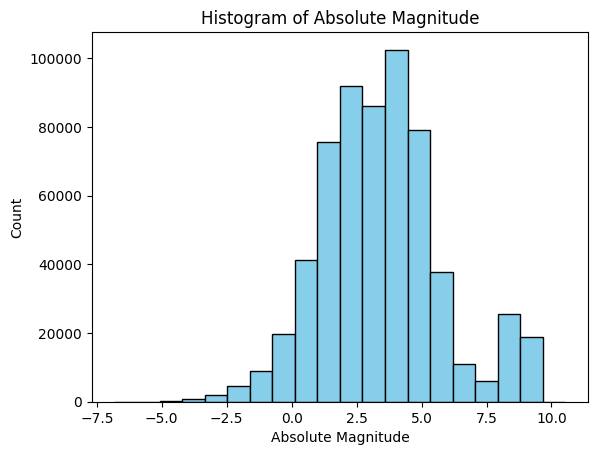

In [30]:

plt.hist(df["ABSmag"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Count")
plt.title("Histogram of Absolute Magnitude")
plt.show()


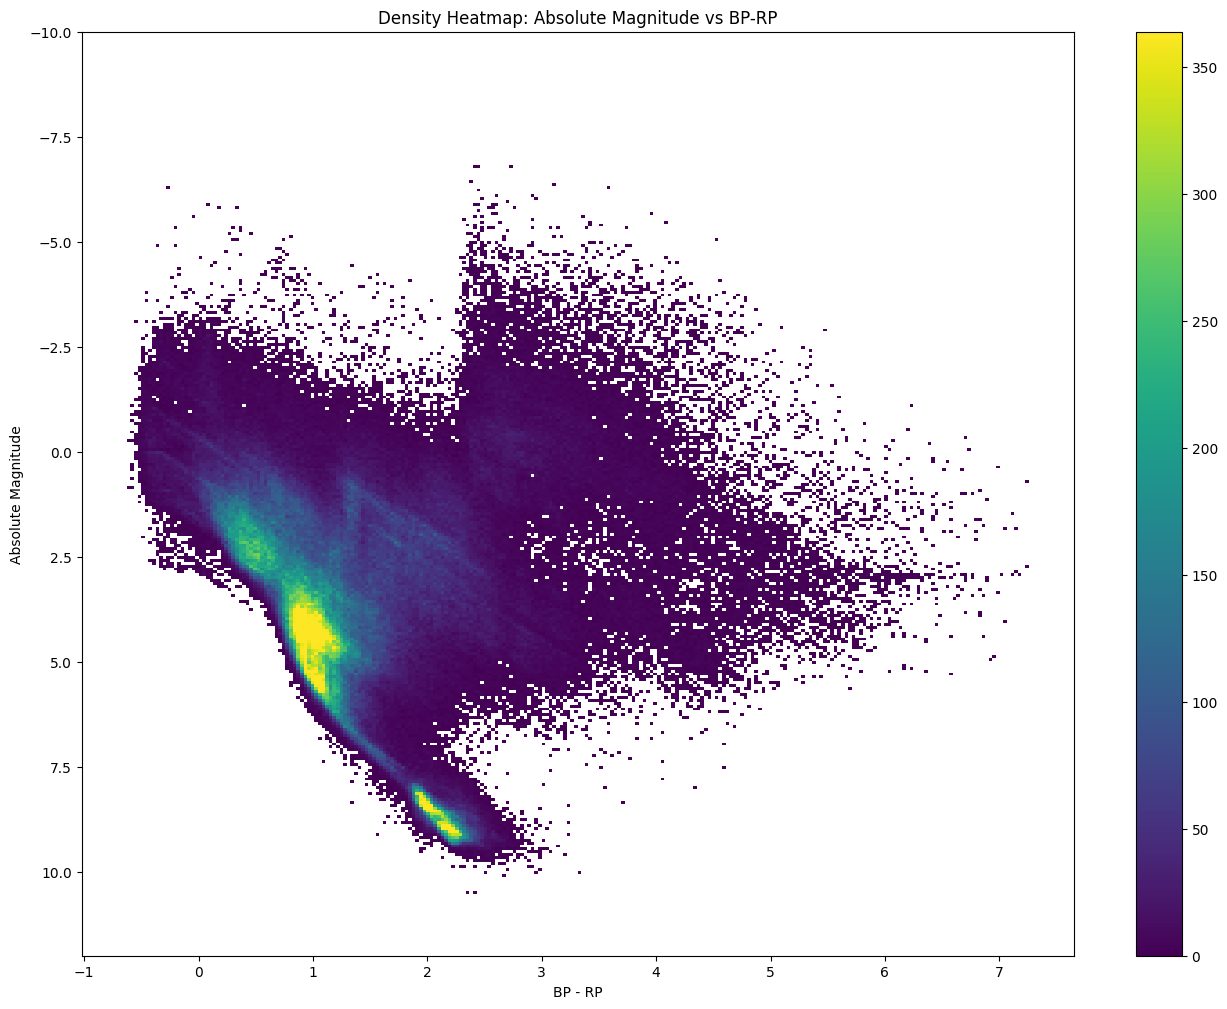

In [31]:
plt.figure(figsize=(16, 12)) 

# 2D histogram (heatmap) for density
sns.histplot(
    data=df,
    x="BP-RP",
    y="ABSmag",
    bins=250,           # number of bins along each axis
    pmax=0.9,          # optional: clip extreme values for color scaling
    cmap="viridis",      # color map for heatmap
    cbar=True          # show color bar
)

plt.xlabel("BP - RP")
plt.ylabel("Absolute Magnitude")
plt.ylim(12, -10)  # reverse y-axis for HR diagram
plt.title("Density Heatmap: Absolute Magnitude vs BP-RP")
plt.show()

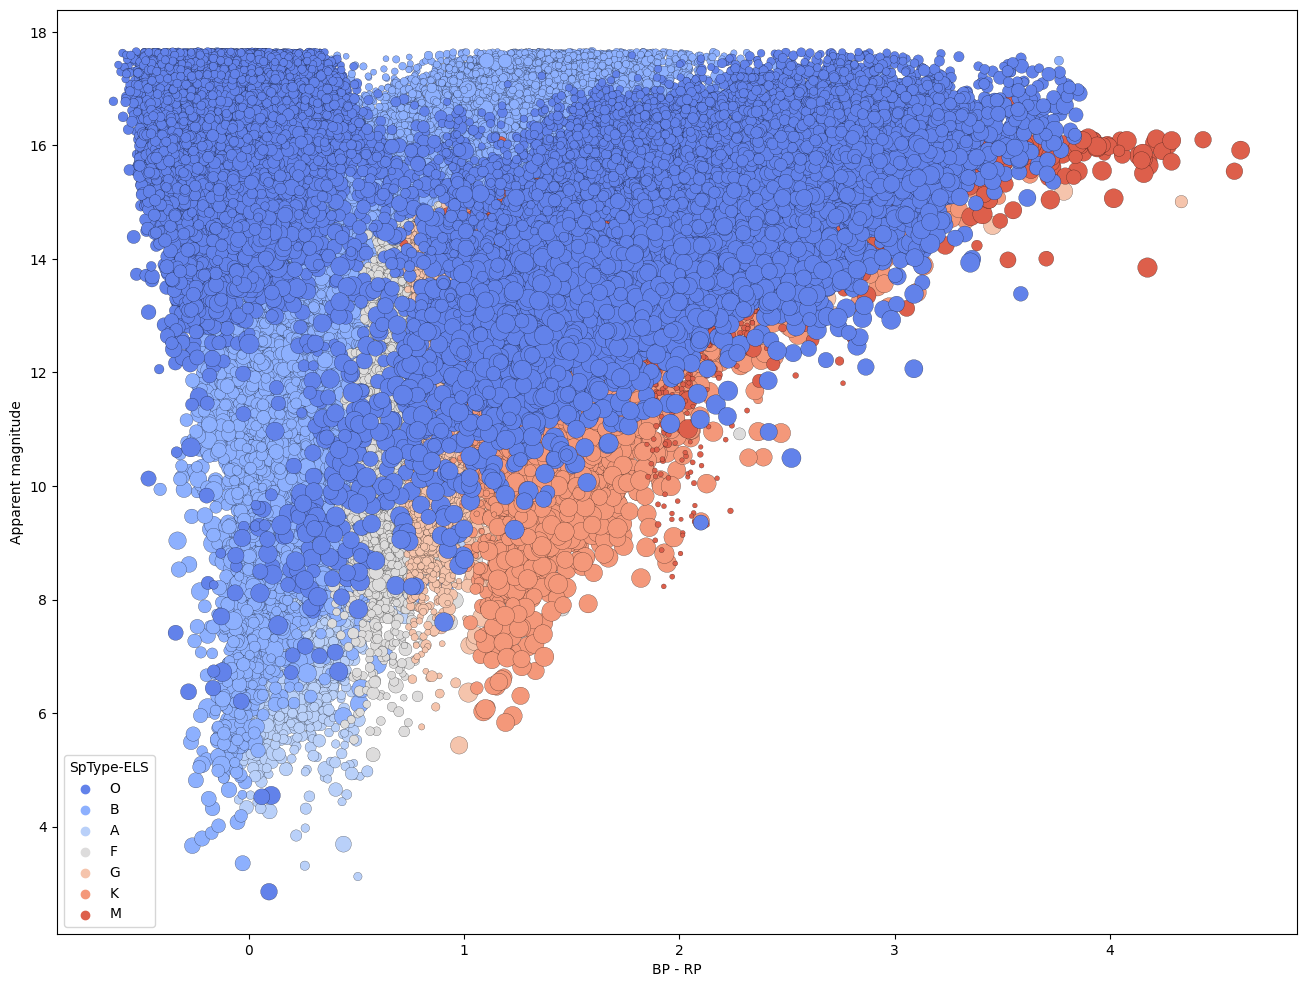

In [32]:
plt.figure(figsize=(16, 12))

# --- Original scatter plot ---
subset = df[df["Rad"] < 10]

sns.scatterplot(
    data=subset,
    x="BP-RP",
    y="Gmag",
    hue="SpType-ELS",
    hue_order=["O      ", "B      ", "A      ", "F      ", "G      ", "K      ", "M      "],
    palette="coolwarm",
    s=subset["Rad"] * 20,
    edgecolor="black",
    linewidth=0.15
)

plt.xlabel("BP - RP")
plt.ylabel("Apparent magnitude")




plt.show()

## Stellar Classification (Machine Learning)

In [ ]:
df["SpType-ELS"].unique()

In [ ]:
df["spectral_class"] = df["SpType-ELS"]

df.head()

In [ ]:
df["spectral_class"]

In [36]:
class_mapping ={
    'O      ': 0,
    'A      ': 1,
    'B      ': 2,
    'F      ': 3,
    'G      ': 4,
    'K      ': 5,
    'M      ': 6,
       
}

df.spectral_class = [class_mapping[item] for item in df.spectral_class]

In [ ]:
df.Plx.max()

### Unsupervised Machine Learning

#### Create the MLDF dataframe

In [ ]:
mldf = df[["RA_ICRS", "DE_ICRS","Plx","pmRA","pmDE","Rad"]]

mldf.head()

In [ ]:
mldf[["RA_ICRS", "DE_ICRS","Plx","pmRA","pmDE","Rad"]].values

In [ ]:
#mldf.to_csv('mldf.csv', index=False) to save mldf as csv

#### Scaled

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mldf[["RA_ICRS", "DE_ICRS","Plx","pmRA","pmDE","Rad"]])
print(X_scaled)

#### HDBSCAN (UMAP & HDBSCAN)

##### 3D

In [ ]:
reducer = umap.UMAP(n_components=3, random_state=47)
projections = reducer.fit_transform(X_scaled)

In [ ]:
fig = px.scatter_3d(
    x=projections[:, 0],
    y=projections[:, 1],
    z=projections[:, 2], 
    color=mldf['Plx'],  # color by parallax
    opacity=0.7,
    width=1000, height=800 
)

fig.update_traces(marker=dict(size=1))   # smaller size (default is ~6)

fig.show()

In [ ]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,      # tune this
    min_samples=7,           # tune this
    cluster_selection_epsilon=0.05,
    metric='euclidean'
)

clusterer.fit(projections)
labels = clusterer.labels_   # 1D array with cluster IDs

In [ ]:
labels_series = pd.Series(labels)
cluster_counts = labels_series.value_counts().sort_index()

print(cluster_counts)

#3208

In [ ]:

fighd = px.scatter_3d(
    x=projections[:, 0],
    y=projections[:, 1],
    z=projections[:, 2],
    color=labels.astype(str),  # color by cluster
    opacity=0.7,
    width=1000, height=800 
)

fighd.update_traces(marker=dict(size=2))
fighd.show()


In [ ]:
df_plot = mldf.copy()
df_plot['cluster'] = clusterer.labels_
df_plot['prob'] = clusterer.probabilities_

# Remove noise
df_clusters = df_plot[df_plot['cluster'] != -1]

# Probability-weighted centroids (best for HDBSCAN)
centroids_ra_de = (
    df_clusters
    .groupby('cluster')
    .apply(lambda g: pd.Series({
        'RA': np.average(g['RA_ICRS'], weights=g['prob']),
        'DE': np.average(g['DE_ICRS'], weights=g['prob'])
    }))
    .reset_index()
)

In [ ]:
figclust = px.scatter(
    centroids_ra_de,
    x = 'RA',
    y = 'DE',
    opacity=1,
    color_discrete_sequence=['red'],
    title='HDBSCAN Cluster Centroids in Sky Coordinates',
    width=1400, height=1000 
)

# Make background points small
figclust.update_traces(marker=dict(size=100), selector=dict(mode='markers', line=dict(width=2, color='black'),symbol='o'))


# Add centroids as a separate trace
figclust.add_trace(
    go.Scatter(
        x=clusterdf['RAJ2000'],
        y=clusterdf['DEJ2000'],
        mode='markers',
        name='Cluster Centroids',
        opacity=0.3,
        marker=dict(
            symbol='x',
            size=clusterdf["r2"] * 10,
            color='purple',
            line=dict(width=2, color='black')
        )
    )
)


figclust.update_xaxes(autorange='reversed')  # RA to left
figclust.show()

##### 2D

In [ ]:
reducer2 = umap.UMAP(n_components=2, random_state=47)
projections2 = reducer2.fit_transform(X_scaled)

In [ ]:
fig2 = px.scatter(
    x=projections2[:, 0],
    y=projections2[:, 1],
    color=mldf['Plx'],  # color by parallax
    opacity=0.7,
    width=1000, height=800 
)

fig2.update_traces(marker=dict(size=1))   # smaller size (default is ~6)

fig2.show()

In [ ]:
clusterer2 = hdbscan.HDBSCAN(
    min_cluster_size=10,      # tune this
    min_samples=8,           # tune this 5
    cluster_selection_epsilon=0.03,
    metric='euclidean'
).fit(projections2)


labels2 = clusterer2.labels_   # 1D array with cluster IDs

In [ ]:
labels_series2 = pd.Series(labels2)
cluster_counts2 = labels_series2.value_counts().sort_index()

print(cluster_counts2)

In [ ]:
len(clusterdf)

In [ ]:
# plt.figure(figsize=(16, 12)) 
# color_palette = sns.color_palette('Paired', 196)

# cluster_colors = [color_palette[x] if x >= 0
#                   else (0.5, 0.5, 0.5)
#                   for x in clusterer2.labels_]

# cluster_member_colors = [sns.desaturate(x, p) for x, p in
#                          zip(cluster_colors, clusterer2.probabilities_)]

# plt.scatter(*projections2.T, s=10, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [ ]:
# plt.figure(figsize=(16, 12))

# color_palette = sns.color_palette('Paired', 196)

# cluster_colors = [
#     color_palette[label] if label >= 0 else (0.6, 0.6, 0.6)
#     for label in clusterer2.labels_
# ]

# cluster_member_colors = [
#     sns.desaturate(color, prob) if label >= 0 else (0.6, 0.6, 0.6)
#     for color, prob, label in zip(
#         cluster_colors,
#         clusterer2.probabilities_,
#         clusterer2.labels_
#     )
# ]

# plt.scatter(
#     mldf['RA_ICRS'],
#     mldf['DE_ICRS'],
#     s=10,
#     linewidth=0,
#     c=cluster_member_colors,
#     alpha=0.35   # slightly higher so grey is visible
# )

# plt.xlabel("RA")
# plt.ylabel("DE")
# plt.title("HDBSCAN Clusters in Original Feature Space")
# plt.show()


In [ ]:
fighd2 = px.scatter(
    x=projections2[:, 0],
    y=projections2[:, 1],
    color=labels2.astype(str),  # color by cluster
    opacity=0.7,
    width=1000, height=800 
)

fighd2.update_traces(marker=dict(size=2))
fighd2.show()

In [ ]:
# import numpy as np
# probs = clusterer2.probabilities_
# core_centers = {}

# for label in np.unique(labels2):
#     if label == -1:
#         continue

#     mask = (labels2 == label) & (probs > 0.8)
#     core_centers[label] = projections2[mask].mean(axis=0)

In [ ]:
# centers = np.array(list(core_centers.values()))

# plt.scatter(projections2[:, 0], projections2[:, 1], c='lightgray', s=10)
# plt.scatter(centers[:, 0], centers[:, 1],
#             c='red', s=200, marker='X', label='Cluster cores')
# plt.legend()
# plt.show()

In [ ]:
df_plot2 = mldf.copy()
df_plot2['cluster'] = clusterer2.labels_
df_plot2['prob'] = clusterer2.probabilities_

# Remove noise
df_clusters2 = df_plot2[df_plot2['cluster'] != -1]

# Probability-weighted centroids (best for HDBSCAN)
centroids_ra_de = (
    df_clusters2
    .groupby('cluster')
    .apply(lambda g: pd.Series({
        'RA': np.average(g['RA_ICRS'], weights=g['prob']),
        'DE': np.average(g['DE_ICRS'], weights=g['prob'])
    }))
    .reset_index()
)

In [ ]:
# Background points
figclust2d = px.scatter(
    mldf,
    x='RA_ICRS',
    y='DE_ICRS',
    opacity=0.3,  # keep slightly transparent
    color_discrete_sequence=['lightgrey'],
    labels={'RA_ICRS': 'RA', 'DE_ICRS': 'DE'},
    title='HDBSCAN Cluster Centroids in Sky Coordinates',
    width=1400,
    height=1000
)

# Make background points small and semi-transparent
figclust2d.update_traces(marker=dict(size=6), selector=dict(mode='markers'))

# Add centroids on top
figclust2d.add_trace(
    go.Scatter(
        x=centroids_ra_de['RA'],
        y=centroids_ra_de['DE'],
        mode='markers',
        name='Cluster Centroids',
        marker=dict(
            symbol='x',      # clearly visible
            size=18,
            color='red',
            line=dict(width=2, color='black')
        )
    )
)

# Invert RA axis for sky plot
figclust2d.update_xaxes(autorange='reversed')

figclust2d.show()


In [ ]:
# Background points (all sources)
figclust2d = px.scatter(
    mldf,
    x='RA_ICRS',
    y='DE_ICRS',
    opacity=0.3,
    color_discrete_sequence=['lightgrey'],
    labels={'RA_ICRS': 'RA', 'DE_ICRS': 'DE'},
    title='HDBSCAN Cluster Centroids in Sky Coordinates',
    width=1400, height=1000 
)

# Make background points small
figclust2d.update_traces(marker=dict(size=6), selector=dict(mode='markers'))

# Add centroids as a separate trace
figclust2d.add_trace(
    go.Scatter(
        x=centroids_ra_de['RA'],
        y=centroids_ra_de['DE'],
        mode='markers',
        name='Cluster Centroids',
        marker=dict(
            symbol='x',
            size=18,
            color='red',
            line=dict(width=2, color='black')
        )
    )
)

# Add centroids as a separate trace
figclust2d.add_trace(
    go.Scatter(
        x=clusterdf['RAJ2000'],
        y=clusterdf['DEJ2000'],
        mode='markers',
        name='Cluster Centroids',
        marker=dict(
            symbol='x',
            size=clusterdf["r2"] * 10,
            color='purple',
            line=dict(width=2, color='black')
        )
    )
)

figclust2d.update_xaxes(autorange='reversed')  # RA to left
figclust2d.show()

In [ ]:
figclust2d = px.scatter(
    centroids_ra_de,
    x = 'RA',
    y = 'DE',
    opacity=1,
    color_discrete_sequence=['red'],
    title='HDBSCAN Cluster Centroids in Sky Coordinates',
    width=1400, height=1000 
)

# Make background points small
figclust2d.update_traces(marker=dict(size=100), selector=dict(mode='markers', line=dict(width=2, color='black'),symbol='o'))


# Add centroids as a separate trace
figclust2d.add_trace(
    go.Scatter(
        x=clusterdf['RAJ2000'],
        y=clusterdf['DEJ2000'],
        mode='markers',
        name='Cluster Centroids',
        opacity=0.3,
        marker=dict(
            symbol='x',
            size=clusterdf["r2"] * 10,
            color='purple',
            line=dict(width=2, color='black')
        )
    )
)


figclust2d.update_xaxes(autorange='reversed')  # RA to left
figclust2d.show()

In [ ]:
# 1

figclust2d = px.scatter(
    centroids_ra_de,
    x = 'RA',
    y = 'DE',
    opacity=1,
    color_discrete_sequence=['red'],
    title='HDBSCAN Cluster Centroids in Sky Coordinates',
    width=1400, height=1000 
)

# Make background points small
figclust2d.update_traces(marker=dict(size=100), selector=dict(mode='markers', line=dict(width=2, color='black'),symbol='o'))


# Add centroids as a separate trace
figclust2d.add_trace(
    go.Scatter(
        x=clusterdf['RAJ2000'],
        y=clusterdf['DEJ2000'],
        mode='markers',
        name='Cluster Centroids',
        opacity=0.3,
        marker=dict(
            symbol='x',
            size=clusterdf["r2"] * 10,
            color='purple',
            line=dict(width=2, color='black')
        )
    )
)


figclust2d.update_xaxes(autorange='reversed')  # RA to left
figclust2d.show()

In [ ]:
figclust2d = px.scatter(
    mldf,
    x='RA_ICRS',
    y='DE_ICRS',
    color=labels2.astype(str),  # string for categorical clusters
    opacity=0.3,
    width=1400, height=1000 
)
figclust2d.add_trace(
    go.Scatter(
        x=clusterdf['RAJ2000'],
        y=clusterdf['DEJ2000'],
        mode='markers',
        marker=dict(
            color='purple',   # fixed color for overlay
            size=clusterdf["r2"] * 10,
            symbol='x',
            opacity = 1
        ),
        name='NASA Identified Cluster'
    )
)



figclust2d.update_layout(yaxis_title='Dec [deg]', xaxis_title='RA [deg]', title='Sky map colored by UMAP clusters')
figclust2d.update_xaxes(autorange='reversed')  # RA to left
figclust2d.show()

In [ ]:
embedding = reducer.fit_transform(X_scaled)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], s=10, alpha=0.7, c = "leiden")
plt.title("UMAP Projection of Star Features (Before HDBSCAN)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

In [ ]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,      # tune this
    min_samples=5,           # tune this
    cluster_selection_epsilon=0.05,
    metric='euclidean'
)

labels = clusterer.fit_predict(X_scaled)

In [ ]:
mldf['cluster'] = labels
mldf['cluster'].value_counts()

In [ ]:
plt.scatter(mldf['RA_ICRS'], mldf['DE_ICRS'], c=mldf['cluster'], s=0.5, cmap="hsv")

In [ ]:
plt.figure(figsize=(16, 12)) 

plt.scatter(mldf['RA_ICRS'], mldf['DE_ICRS'], c=mldf['cluster'], s=0.5, cmap="Paired")


plt.scatter(clusterdf['RAJ2000'],clusterdf['DEJ2000'], c="purple", s = clusterdf["r2"] * 200, alpha=0.2)


plt.xlabel("RA")
plt.ylabel("Dec")
plt.show()

In [ ]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,      # tune this
    min_samples=5,           # tune this
    cluster_selection_epsilon=0.05,
    cluster_selection_method = "leaf",
    metric='euclidean'
)

labels = clusterer.fit_predict(X_scaled)


In [ ]:
mldf['cluster'] = labels
mldf['cluster'].value_counts()

In [ ]:
plt.figure(figsize=(16, 12)) 

plt.scatter(mldf['RA_ICRS'], mldf['DE_ICRS'], c=mldf['cluster'], s=0.5)
plt.xlabel("RA")
plt.ylabel("Dec")
plt.show()

In [ ]:
plt.figure(figsize=(16, 12)) 

plt.scatter(mldf['RA_ICRS'], mldf['DE_ICRS'], c=mldf['cluster'], cmap="viridis")
plt.xlabel("RA")
plt.ylabel("Dec")
plt.show()

#### K-means 

In [11]:
scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(mldf[["RA_ICRS", "DE_ICRS"]])
print(X_scaled_2)

[[-0.62360402 -0.93719412]
 [-0.65452224 -0.91148551]
 [-0.66875425 -0.9105711 ]
 ...
 [ 2.05779352 -1.16495009]
 [ 2.05711054 -1.13709303]
 [ 2.07785171 -1.10267537]]


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_2)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS values
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3208)
kmeans.fit(mldf[["RA_ICRS", "DE_ICRS"]])
y_kmeans = kmeans.predict(mldf[["RA_ICRS", "DE_ICRS"]])

In [ ]:
plt.figure(figsize=(16, 12)) 
# plt.scatter(X_scaled_2[:, 0], X_scaled_2[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5,  cmap='viridis');

plt.scatter(clusterdf['RAJ2000'], clusterdf['DEJ2000'], c='purple', s=50, marker = '*')

#### Spectral Clustering (In Progress [Problem])

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
sc = SpectralClustering(n_clusters=3208, affinity='nearest_neighbors', random_state=0)
y_sc = sc.fit_predict(X_scaled_2)

# 3. Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_sc, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title(f'Spectral Clustering Results with {3208} clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_data = linkage(X_scaled_2, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

: 

In [ ]:
import numpy, scipy, numba, sklearn, umap
print("NumPy:", numpy.__version__)
print("SciPy:", scipy.__version__)
print("Numba:", numba.__version__)
print("scikit-learn:", sklearn.__version__)
print("umap:",umap.__version__)

## Supervised Machine Learning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Train and Test 
X = df[['RA_ICRS', 'DE_ICRS', 'Dist','ABSmag','Rad','BP-RP']]
y = df['SpType-ELS']




In [ ]:
correlation_full_health = df[['RA_ICRS', 'DE_ICRS', 'Dist','ABSmag','Rad','BP-RP']].corr()

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaled Data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

### Random Forest (Determining Star Type)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [2,3,5,10,20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [5,10],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

In [ ]:
df['SpType-ELS'].unique()

In [ ]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_pred, y_test, target_names= ['A      ', 'B      ', 'F      ', 'G      ', 'K      ', 'M      ',
       'O      ']))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [ ]:
def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [ ]:
clf_gini = train_using_gini(X_train, X_test, y_train)

In [ ]:
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [ ]:
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))

In [ ]:
# Operational Phase
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)